In [1]:
import numpy as numpy


## Saturation pressure and Thermodynamic Properties


## Water

In [2]:
#gas constant
R = 8.3144598 #J.mol^−1.K^−1

In [3]:
#Pure component critical point of water
# Tc (K)
Tc = 647.3 #K

# Pc (bar)
Pc = 221.2*(10**5) #Pa

# correlation

w = 0.344

In [4]:
#State equation parameters

T = numpy.linspace(200,Tc,300)  #K
omega=0.086640
b = (omega*R*Tc)/Pc
#print(b)








In [5]:
def a(T):
    #print(w,Tc)    
    return (
    
    (R*R*Tc*Tc*0.427480/Pc)*
        
        (1+((0.480+1.574*w-0.176*w*w)*(1-(numpy.sqrt(T/Tc)))))**2
        
 
    
    ) #definiçaõ de função

print(a(Tc))
print(a(0.5*Tc))

0.559770449092
0.935963723295


In [6]:
def calcV(P,T):
    c1=P
    c2=-R*T
    c3=-b*R*T-P*b*b+a(T)
    c4=-a(T)*b
    V=numpy.roots([c1,c2,c3,c4])
    Vl = min(V)
    Vv = max(V)
    return (Vl,Vv)



In [7]:

def phiv(P,T):
    c1=P
    c2=-R*T
    c3=-b*R*T-P*b*b+a(T)
    c4=-a(T)*b
    V=numpy.roots([c1,c2,c3,c4])
    Vv= max(V)
    return numpy.exp(((P*Vv)/(R*T))-1-numpy.log(((P*Vv)/(R*T))-(b*P)/(R*T))- (a(T)/(b*R*T))*numpy.log((((P*Vv)/(R*T))+ (b*P)/(R*T))/((P*Vv)/(R*T)))), Vv

def phil(P,T):
    c1=P
    c2=-R*T
    c3=-b*R*T-P*b*b+a(T)
    c4=-a(T)*b
    V=numpy.roots([c1,c2,c3,c4])
    Vl= min (V)
   
    return numpy.exp(((P*Vl)/(R*T))-1-numpy.log(((P*Vl)/(R*T))-(b*P)/(R*T))- (a(T)/(b*R*T))*numpy.log((((P*Vl)/(R*T))+ (b*P)/(R*T))/((P*Vl)/(R*T)))),Vl

print(phiv(100000,373))
print(phil(100000,373))


(0.99171885667143533, 0.030754059968649258)
(0.91440517972625357, 2.5300642490266645e-05)


In [8]:
def S_res(T,P,V):
    Tr=T/Tc
    dev=(402374603786943180544511778531*((2253215889523281*Tr**(1/2))/2251799813685248 - 4505015703208529/2251799813685248))/(316912650057057350374175801344*Tr**(1/2))
    Z=(P*V)/(R*T);
    q=a(T)/(b*R*T);
    beta=b*P/(R*T);
    I=numpy.log((Z+beta)/Z)
   
    return numpy.log(Z-beta)+ dev*q*I

In [9]:
def H_res(T,P,V):

    Tr=T/Tc
    dev=(402374603786943180544511778531*((2253215889523281*Tr**(1/2))/2251799813685248 - 4505015703208529/2251799813685248))/(316912650057057350374175801344*Tr**(1/2))
    Z=(P*V)/(R*T);
    q=a(T)/(b*R*T);
    beta=b*P/(R*T);
    I=numpy.log((Z+beta)/Z);

    return Z-1+ (dev-1)*q*I

In [10]:
def P_sat(T,P_iguess):

    RES=1
    TOL=1e-9
    MAX=1000
    i=0
    P=P_iguess
    while(RES>TOL and i<MAX): 
        
        valor_phi_L, Vol_L = phil(P,T)
        valor_phi_V, Vol_V = phiv(P,T)
        
        P=P*(valor_phi_L/valor_phi_V)
        RES=abs((valor_phi_L/valor_phi_V)-1.)
        i=i+1
        #print(phil(P,T))
        #print(phiv(P,T))
        #print(P_sat)
        
    HRES_L=H_res(T,P,Vol_L)
    HRES_V=H_res(T,P,Vol_V)
    SRES_L=S_res(T,P,Vol_L)
    SRES_V=S_res(T,P,Vol_V)  
        
        
        
    return P, Vol_L, Vol_V, HRES_L, HRES_V,SRES_L,SRES_V

P_loop=(80000)
print(P_sat(303,P_loop))
valP = numpy.zeros(300)
val_L = numpy.zeros(300)
val_V = numpy.zeros(300)
HR_L= numpy.zeros(300)
HR_V = numpy.zeros(300)
SR_L= numpy.zeros(300)
SR_V= numpy.zeros(300)
for j in range(300): #criação de um loop
    T_=T[j]
    valP[j], val_L[j],val_V[j],HR_L[j],HR_V[j],SR_L[j],SR_V[j]= P_sat(T_,P_loop)

    
    

    




                

(3188.9813648833328, 2.386793546283712e-05, 0.78963172463452513, -40.774912191213367, -0.0021381543724091128, -40.774451657355414, -0.0016776205144556724)


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:40: ComplexWarning: Casting complex values to real discards the imaginary part


In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

## Saturation Pressure by Antoine:

In [13]:
A1=8.07131
B1=1730.63
C1=-40.426
f=133.32

def P1_Sat(T):
    P1=(10**(A1 - (B1/(C1+T))))*f
    return P1
print(P1_Sat(303))

A2=8.14019
B2=1810.94
C2=-29.485 


def P2_Sat(T):
    P2 = (10**(A2 - (B2/(C2+T))))*f
    return P2
print(P2_Sat(523))

T1=numpy.linspace(200,373,100)
val1 = numpy.zeros(100)

for i in range(100):
        T1_=T1[i]
        val1[i]=P1_Sat(T1_)
        #print(T1,val1)
   
 
T2=numpy.linspace(374,641,100)

val2 = numpy.zeros(100)  

for i in range(100):
    T2_=T2[i]
    val2[i]=P2_Sat(T2_)
    #print(val2)
    
# plt.figure(2)
# plt.semilogy(1)
# plt.plot(T1,val1)
# plt.plot(T2,val2)
# plt.xlim([200,Tc*1.05])
# plt.ylim([100,Pc*10])
# plt.show()
    

4028.9061772324076
3941052.6728651645


## Saturation Pressure by:

* SRK equation 
* Antoine equation 
* Experimental values



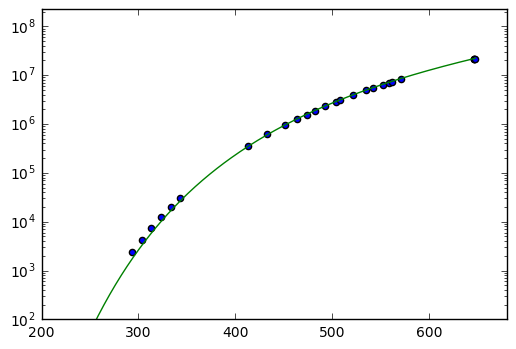

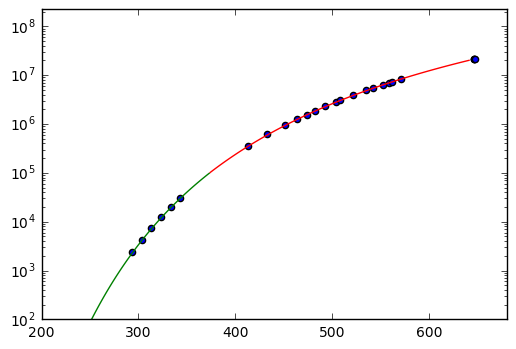

In [14]:
dadosexp = numpy.loadtxt('exp_data_vapor_pressure_water.txt', dtype='float', comments='#', converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
T_exp = dadosexp[:,0]
P_exp = dadosexp[:,1]*1000

plt.figure(1)
plt.semilogy(1)
plt.scatter(T_exp,P_exp)
plt.plot(T,valP)
plt.xlim([200,Tc*1.05])
plt.ylim([100,Pc*10])
plt.show()
plt.figure(2)
plt.semilogy(1)
plt.scatter(T_exp,P_exp)
plt.xlim([200,Tc*1.05])
plt.ylim([100,Pc*10])
plt.plot(T1,val1)
plt.plot(T2,val2)
plt.show()

## Diagram Thermodynamics 

## P X V

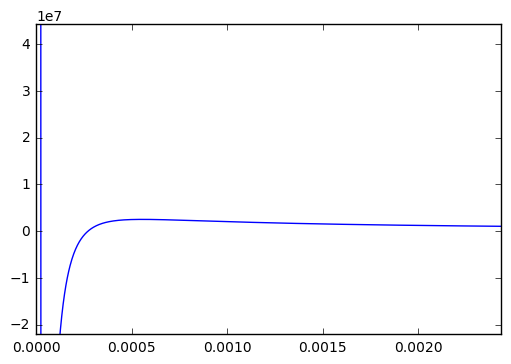

In [15]:
def SRK(V,T):
    
    P= ((R*T)/(V-b)) - (a(T)/(V*(V+b)))
    #print(b)
    #print(a(T),R)
    return P
 
Vc=R*Tc/Pc
 


V=numpy.linspace(b*1.0001,10*Vc,1000)
plt.figure(1)
plt.plot(V,SRK(V,343))
#print(SRK(V,343))
plt.xlim(0,10*Vc)
plt.ylim(-1*Pc,2*Pc)
plt.show()    

    

## P X H

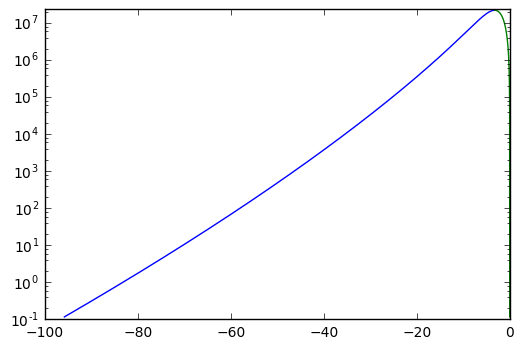

In [32]:
#Enthalpy for ideal gas
def Hid(T):
    a0=4.395
    a1=-4.186*0.001
    a2=1.405*10**-5
    a3=1.564*10**-8
    Tref=273.15
    int_cp_l=a0*(T-Tref)+a1*(T*T-Tref*Tref)*0.5+a2*(T*T*T-Tref*Tref*Tref)*(1/3);
    return int_cp_l
#print(Hid(303))
#Hl=numpy.zeros(300)
Hl=Hid(T)+HR_L
Hv=Hid(T)+HR_V

Hl=HR_L
Hv=HR_V

#print(Hl)
#print(valP)
#print(H_liq)


plt.figure(1)
plt.semilogy(Hl,valP)
#plt.plot(Hv,valP)
plt.semilogy(Hv,valP)
#plt.xlim(-500,0)
plt.ylim(0.1,1.05*Pc)
plt.show() 


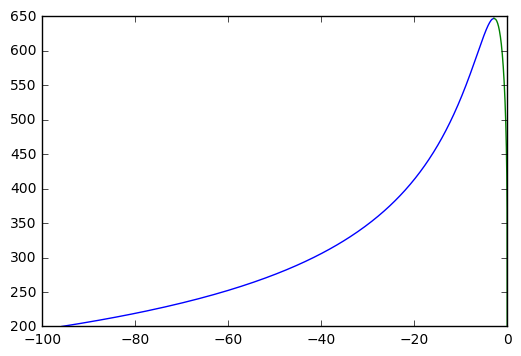

In [35]:
#Entropy for ideal gas
def Sid(P,T):
    Pref=1*10**5
    a0=4.395
    a1=-4.186*0.001
    a2=1.405*10**-5
    a3=1.564*10**-8
    a4=0.632*10**-11
    Tref=273.15
    return R*(a4/4*(T**4-Tref**4)+a3/3*(T**3-Tref**3)+a2/2*(T**2-Tref**2)+a1*(T-Tref)+a0*numpy.log(T/Tref))-R*numpy.log(P/Pref)
    
Sl=SR_L#+Sid(valP,T)
Sv=SR_V#+Sid(valP,T)

plt.figure(1)
plt.plot(Sl,T)
#plt.plot(Hv,valP)
plt.plot(Sv,T)
#plt.xlim(30,130)
#plt.ylim(0.1,1.05c)
plt.show() 

#print(Sl)

In [34]:
#print(valP)
#print(Hl) 
#print(Hv)
